## Exploratory Data Analysis

### Initial Data Handling

Our first step is to import our libraries for analysis:

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Next we need to load our dataset for inspection:

In [2]:
df = pd.read_csv("../data/food_price_feature_engineered_clean.csv")

In [3]:
print(df.info())      # shows column names, types, and missing values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   country                             25 non-null     object 
 1   iso3                                25 non-null     object 
 2   components                          25 non-null     object 
 3   currency                            25 non-null     object 
 4   number_of_food_items                25 non-null     int64  
 5   data_coverage_food                  25 non-null     float64
 6   average_annualized_food_inflation   25 non-null     float64
 7   maximum_food_drawdown               25 non-null     float64
 8   average_annualized_food_volatility  25 non-null     float64
 9   date                                25 non-null     object 
 10  open                                25 non-null     float64
 11  high                                25 non-null

Here we can see that our dataset has the shape of 25 rows and 18 columns. 
We notice that each row is specific data concerning a seperate country.
We also notice that our date is in float64 format, so it will be necessary to convert this to 'datetime'

In [4]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   country                             25 non-null     object        
 1   iso3                                25 non-null     object        
 2   components                          25 non-null     object        
 3   currency                            25 non-null     object        
 4   number_of_food_items                25 non-null     int64         
 5   data_coverage_food                  25 non-null     float64       
 6   average_annualized_food_inflation   25 non-null     float64       
 7   maximum_food_drawdown               25 non-null     float64       
 8   average_annualized_food_volatility  25 non-null     float64       
 9   date                                25 non-null     datetime64[ns]
 10  open                        

Now that we have converted our 'date' column into the correct format, let's go ahead and transform our 'object' data types to categories.

In [5]:
# Convert object columns to category dtype
cat_cols = ["country", "iso3", "components", "currency", "inflation_band"]
for cat in cat_cols:
    df[cat] = df[cat].astype("category")

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   country                             25 non-null     category      
 1   iso3                                25 non-null     category      
 2   components                          25 non-null     category      
 3   currency                            25 non-null     category      
 4   number_of_food_items                25 non-null     int64         
 5   data_coverage_food                  25 non-null     float64       
 6   average_annualized_food_inflation   25 non-null     float64       
 7   maximum_food_drawdown               25 non-null     float64       
 8   average_annualized_food_volatility  25 non-null     float64       
 9   date                                25 non-null     datetime64[ns]
 10  open                        

We have now successfully converted our columns into the correct data types.
Next let us check for any missing values and duplicates:

In [7]:
# Inspect missing values.
df.isna().sum().sort_values(ascending=False)


country                               0
iso3                                  0
month                                 0
year                                  0
inflation                             0
close                                 0
low                                   0
high                                  0
open                                  0
date                                  0
average_annualized_food_volatility    0
maximum_food_drawdown                 0
average_annualized_food_inflation     0
data_coverage_food                    0
number_of_food_items                  0
currency                              0
components                            0
inflation_band                        0
dtype: int64

Great, we see that there are no missing values, now let us check for duplicates:

In [8]:
# Inspect duplicates.
df.duplicated().sum()
df[df.duplicated()]


,country,iso3,components,currency,number_of_food_items,data_coverage_food,average_annualized_food_inflation,maximum_food_drawdown,average_annualized_food_volatility,date,open,high,low,close,inflation,year,month,inflation_band


In [9]:
# Identify numeric vs categorical columns
num_cols = df.select_dtypes(include="number").columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

num_cols, cat_cols

(['number_of_food_items',
  'data_coverage_food',
  'average_annualized_food_inflation',
  'maximum_food_drawdown',
  'average_annualized_food_volatility',
  'open',
  'high',
  'low',
  'close',
  'inflation',
  'year',
  'month'],
 ['country', 'iso3', 'components', 'currency', 'inflation_band'])

We can now see that we do not have any duplicated entries in our dataset.
As we are relatively confident about having correctly converted our data types, and that we have no missing values or duplicated entries; we can now move on to our inital, exploratory data analysis. 

### Hypotheses:

In order to better understand the drivers of food price inflation, we propose the following hypotheses:

### H1 – Geopolitical Unrest and Inflation
- **Null Hypothesis:** There is no relationship between geopolitical unrest or crises and food inflation rates.  
- **Alternative Hypothesis:** Countries experiencing greater geopolitical unrest or crises will have higher food inflation rates.  
- **Rationale:** Conflict disrupts supply chains, weakens currencies, and raises import costs. Outliers such as Lebanon, South Sudan, and Syria suggest that crises may drive extreme inflation.

---

### H2 – Volatility and Inflation
- **Null Hypothesis:** Food price volatility is independent of food inflation rates.  
- **Alternative Hypothesis:** Countries with higher average annualized food price volatility will also have higher inflation rates.  
- **Rationale:** Unstable markets often face upward price pressures. Our scatter plot indicates a moderate positive relationship between volatility and inflation, with countries like Lebanon and Sudan showing both high inflation and volatility.

---

### H3 – Data Coverage and Inflation
- **Null Hypothesis:** Inflation outcomes are influenced by the level of data coverage.  
- **Alternative Hypothesis:** Inflation outcomes are independent of data coverage levels.  
- **Rationale:** If countries with low data coverage systematically showed extreme inflation, results would be questionable. However, our analysis shows extreme inflation even in countries with high coverage, suggesting that inflation results reflect real economic pressures.

---

**Summary:**  
- **H1** explores external, real-world drivers of inflation (geopolitical unrest).  
- **H2** tests an internal relationship within the dataset (volatility vs inflation).  
- **H3** checks data robustness by ruling out potential bias from coverage.


### Univariate Analysis:
Firstly we will look at univariate analysis of each numeric column:

In [10]:
desc = df[num_cols].describe().T  # count, mean, std, min, quartiles, max
desc


,count,mean,std,min,25%,50%,75%,max
number_of_food_items,25.0,9.3200,7.016172,3.00,4.00,7.00,11.00,26.00
data_coverage_food,25.0,35.3404,17.451470,8.84,21.55,31.08,47.97,69.91
average_annualized_food_inflation,25.0,12.1988,15.052045,1.24,3.58,6.68,10.79,55.30
maximum_food_drawdown,25.0,-22.8580,11.123922,-40.67,-31.98,-23.71,-13.96,-2.79
average_annualized_food_volatility,25.0,10.5904,5.413819,1.84,7.15,9.89,12.58,24.77
open,25.0,7.0976,16.762704,1.07,1.40,1.45,2.57,77.30
high,25.0,7.2752,17.269724,1.08,1.42,1.48,2.62,79.99
low,25.0,6.9152,16.255538,1.05,1.36,1.43,2.52,74.61
close,25.0,6.9876,16.377158,1.06,1.39,1.46,2.56,75.16
inflation,25.0,20.0840,35.317431,-15.91,0.04,6.41,27.13,139.28


Let us further illustrate our findings by producing both Histograms and Boxplots, visualising inflation as our primary variable.

**Figure 1: Distribution of Inflation**

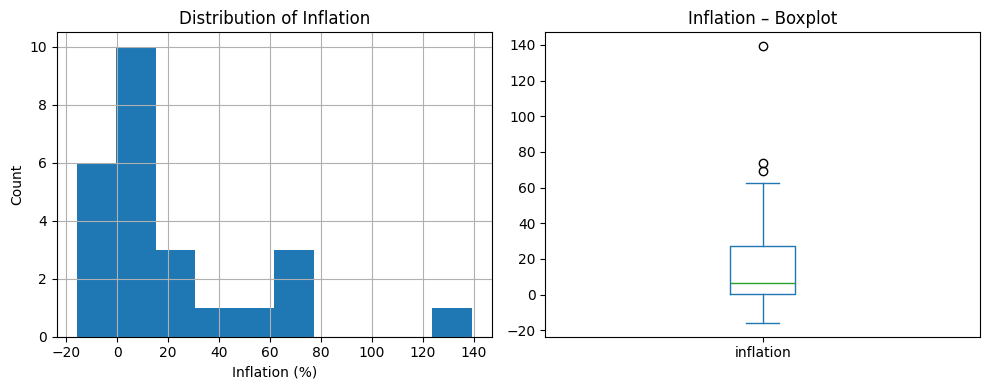

In [11]:
# Histogram + Boxplot of Inflation
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df["inflation"].hist(bins=10)
plt.xlabel("Inflation (%)"); plt.ylabel("Count"); plt.title("Distribution of Inflation")

plt.subplot(1,2,2)
df["inflation"].plot(kind="box")
plt.title("Inflation – Boxplot")
plt.tight_layout()
plt.show()

**Figure 2: Inflation by Country**

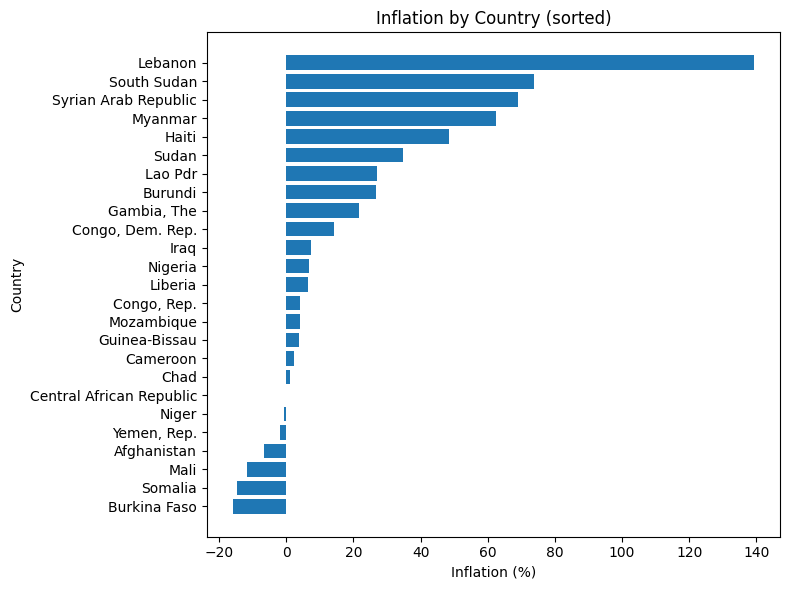

In [12]:
# Bar chart of Inflation by Country (sorted)
plt.figure(figsize=(8,6))
tmp = df.sort_values("inflation", ascending=False)
plt.barh(tmp["country"], tmp["inflation"])
plt.xlabel("Inflation (%)"); plt.ylabel("Country")
plt.title("Inflation by Country (sorted)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Figure 3: Top 5 vs Bottom 5 Countries by Inflation**

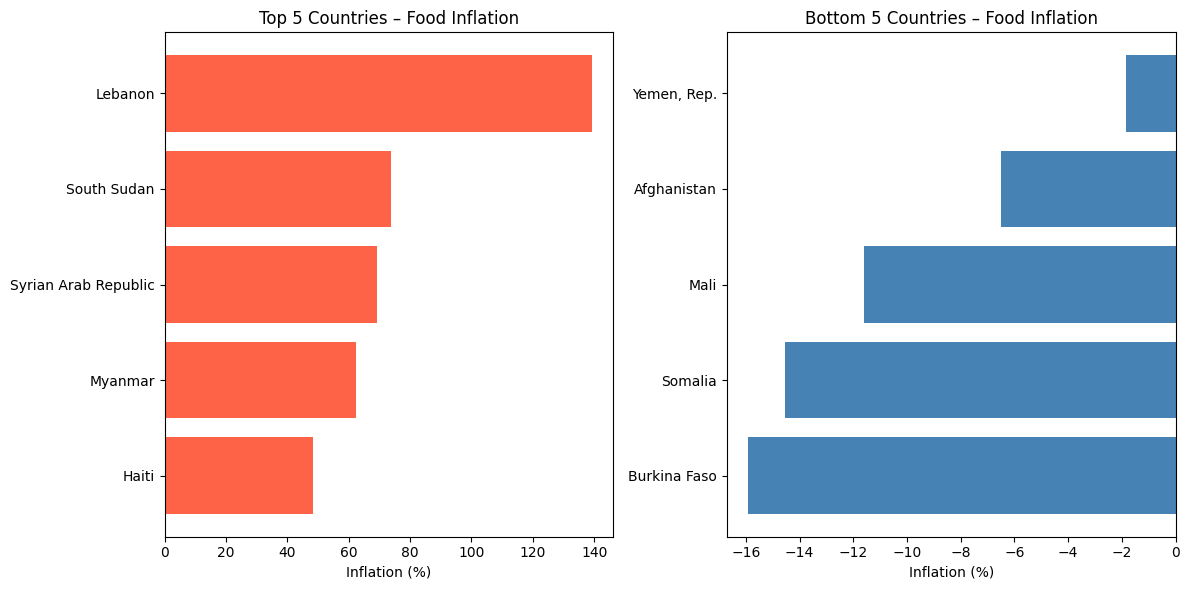

In [13]:
# Top 5 vs Bottom 5 Countries by Food Inflation
# Sort by inflation
df_sorted = df.sort_values("inflation", ascending=False)

# Top 5 and Bottom 5
top5 = df_sorted.head(5)
bottom5 = df_sorted.tail(5)

# Create side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Top 5
axes[0].barh(top5["country"], top5["inflation"], color="tomato")
axes[0].invert_yaxis()  # highest on top
axes[0].set_title("Top 5 Countries – Food Inflation")
axes[0].set_xlabel("Inflation (%)")

# Bottom 5
axes[1].barh(bottom5["country"], bottom5["inflation"], color="steelblue")
axes[1].invert_yaxis()
axes[1].set_title("Bottom 5 Countries – Food Inflation")
axes[1].set_xlabel("Inflation (%)")

plt.tight_layout()
plt.show()


### Food Price Inflation – Quick Insights

Our exploratory analysis highlights several **key patterns** in the data:

### 1. Inflation is highly uneven across countries
- Most countries show **modest inflation** (median ≈ 6.4%).  
- However, a small number of countries face **very high inflation**, which pushes the average up (mean = 20%).  
- **Lebanon stands out** with food inflation above 139% — far higher than any other country.  

*See Figure 1 (Histogram & Boxplot) - This illustrates the skewness: most values are clustered at the low end, with a few extreme outliers.*

---

### 2. Some countries are experiencing deflation
- At least 5 countries (e.g., **Burkina Faso, Somalia, Mali, Afghanistan, Yemen**) show **negative food inflation** (deflation).  
- This means food prices are actually falling in those markets, contrary to the general upward trend elsewhere.  

*See Figure 2 (Bar Chart of Inflation by Country) - The chart clearly shows countries with negative inflation on the left-hand side.*

---

### 3. Top vs Bottom performers
- **Highest inflation countries:** Lebanon, South Sudan, Syria, Myanmar, Haiti.  
- **Deflationary countries:** Burkina Faso, Somalia, Mali, Afghanistan, Yemen.  

*See Figure 3 (Top/Bottom 5 Bar Charts) - These league tables highlight the extremes at both ends.*

---

### Key Takeaways
- **Food price inflation is not uniform**: some countries face crises, others have stable or even falling prices.  
- The **global average hides big differences**. Outliers (like Lebanon) dominate the picture.  
- These insights are quick-to-interpret and give a clear basis for further discussion or deeper analysis.

---

### Figures
- **Figure 1:** Histogram & Boxplot of Inflation (distribution & skewness).  
- **Figure 2:** Inflation by Country (sorted horizontal bar chart).  
- **Figure 3:** Top 5 vs Bottom 5 Countries by Inflation.




### About Distribution of Food Inflation:

The distribution of food inflation is **positively skewed**:

- Most countries fall between **0% and 10%** inflation.
- A handful of countries face **very high inflation** (e.g., Lebanon 139%, South Sudan 74%, Syria 69%).
- This creates a **long right-hand tail** in the distribution.

**Implications:**
- The **median (6.4%)** is a better measure of “typical” inflation than the mean (20.1%), which is distorted by outliers.
- Global averages **hide country-level variation**.  
- It’s more accurate to say that **most countries are stable**, while a small number are in severe crisis.


### Bivariate Analysis
In this section, we will check for relationships between the primary variables we are concerned with (Food Price Inflation).
Firstly we will look at testing Inflation vs Volatility. Are the countries with highest inflation also hgave the most volatile food prices?
Let us create a scatter plot by considering *inflation* vs *average_annualized_food_volatility* variables.

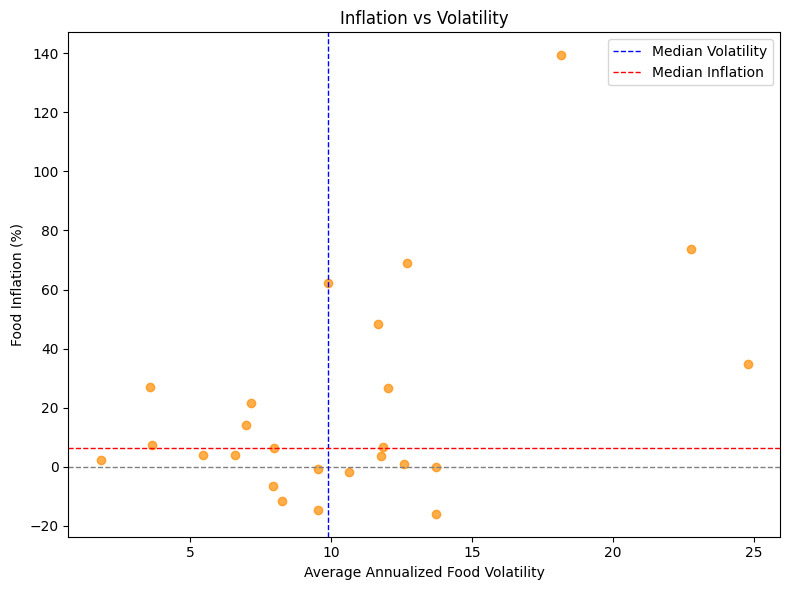

In [14]:
# Scatter plot of Inflation vs Volatility
plt.figure(figsize=(8,6))
plt.scatter(
    df["average_annualized_food_volatility"],
    df["inflation"],
    color="darkorange",
    alpha=0.7
)

plt.xlabel("Average Annualized Food Volatility")
plt.ylabel("Food Inflation (%)")
plt.title("Inflation vs Volatility")

# Add simple reference lines
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.axvline(df["average_annualized_food_volatility"].median(), color="blue", linestyle="--", linewidth=1, label="Median Volatility")
plt.axhline(df["inflation"].median(), color="red", linestyle="--", linewidth=1, label="Median Inflation")

plt.legend()
plt.tight_layout()
plt.show()


Let's recreate this scatter plot using Plotly to allow us the ability to hover over data points in order to identify our countries. 

In [15]:
import plotly.express as px

fig = px.scatter(
    df,
    x="average_annualized_food_volatility",
    y="inflation",
    hover_name="country",  # country name appears on hover
    size="number_of_food_items",  # optional: bubble size by number of items tracked
    color="inflation_band",       # optional: color points by inflation band
    title="Inflation vs Volatility (Interactive)",
    labels={
        "average_annualized_food_volatility": "Average Annualized Food Volatility",
        "inflation": "Food Inflation (%)"
    }
)

fig.update_traces(marker=dict(opacity=0.8, line=dict(width=1, color="DarkSlateGrey")))
fig.show()


c:\Users\hidde\Documents\vscode-projects\food-price-inflation-analysis\.venv\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers


### Inflation vs Volatility

This scatter plot compares **food inflation (%)** with **average annualized food price volatility**.

**Observations:**
- There is a **moderate positive relationship** - countries with higher inflation also tend to show higher volatility.
- For example:
  - **Lebanon, South Sudan, Sudan** appear in the upper-right corner (both high inflation and high volatility).
  - Countries like **Cameroon and Iraq** have low inflation *and* low volatility, clustering near the bottom-left.
- The **median lines** help highlight that most countries fall below both thresholds, with only a few outliers driving the upper ranges.

**Interpretation:**
- This suggests that extreme food inflation often comes hand-in-hand with **unstable, unpredictable prices**.
- Policymakers and analysts should be cautious: high inflation is not just about prices rising, but also about prices becoming erratic, which compounds risks for consumers.

---

### Inflation vs Maximum Food Drawdown
Next let us compare the *inflation* variable vs *maximum_food_drawdown* 
In finance and economics 'drawdown' is used to describe the peak-to-trough decline of a price over a given period, from it's maximum price, to it's minimum. It is typically expressed as a percentage, although we can see in our dataset that it is given as a negative number, representing the *losses*. Therefore, we can assume that the greater the negative drawdown, the worse the past collapse in food prices has been. 

Comparing *drawdown* to *inflation* will allow us to see:
- large drawdown can indicate a fragile food system
- if a country has experienced a sharp collapse in the past, it may also be more vulnerable to inflationary spikes moving forward
- is there any pattern between countries with severe past price collapses and current inflation levels?

Due to the negative values in our drawdown column, it makes sense to convert these into absolute numbers (conversion to positive numbers) in order to clarify our visualisations.



In [18]:
import plotly.express as px

# Create a column for absolute drawdown (magnitude)
df["max_drawdown_abs"] = df["maximum_food_drawdown"].abs()

fig = px.scatter(
    df,
    x="max_drawdown_abs",
    y="inflation",
    hover_name="country",
    color="inflation_band",
    size="number_of_food_items",
    title="Inflation vs Maximum Food Drawdown (Absolute)",
    labels={
        "max_drawdown_abs": "Maximum Food Drawdown (absolute %)",
        "inflation": "Food Inflation (%)"
    }
)

fig.update_traces(marker=dict(opacity=0.8, line=dict(width=1, color="DarkSlateGrey")))
fig.show()


c:\Users\hidde\Documents\vscode-projects\food-price-inflation-analysis\.venv\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Inflation vs Maximum Food Drawdown

- **Definition:** Maximum food drawdown represents the largest historical collapse in food prices (peak to trough).
- In our dataset, values are negative by construction, so we use **absolute values** to show magnitude.

**Observations:**
- Some countries with **large past collapses** (e.g., Afghanistan, Mali, Nigeria, Somalia) currently show **deflation or modest inflation**.
- Meanwhile, countries like **Lebanon and South Sudan** have very high inflation but relatively smaller historical drawdowns.
- This suggests that **past drawdowns are not a reliable predictor** of current inflation levels.

**Interpretation:**
- A severe past collapse in food prices does not necessarily mean high inflation today.
- Instead, inflation seems more connected to **current volatility and economic instability** rather than past crashes.

---

### Inflation Vs Data Coverage

Before visualising, it is important to understand why **data coverage** matters.

- **Definition:**  
  Data coverage represents how much of a country’s food basket or food market is captured in this dataset.  
  - High coverage (e.g., ~70%) = a broad, representative picture.  
  - Low coverage (e.g., ~10%) = only a small subset of foods is being tracked.  

- **Why it matters:**  
  - Countries with **low coverage** might show extreme inflation or deflation values simply because a few items dominate the measurement.  
  - Countries with **high coverage** give a more reliable and representative measure of food price inflation.  

- **Our goal:**  
  By comparing **Inflation vs Data Coverage**, we want to check if extreme inflation cases (e.g., Lebanon, South Sudan) are genuine economic crises, or if they could partly be explained by limited data coverage.  

In other words, this analysis helps us separate **real inflation pressures** from possible **data artefacts**.


In [19]:
# Create a scatter plot for data coverage vs inflation

fig = px.scatter(
    df,
    x="data_coverage_food",
    y="inflation",
    hover_name="country",   # shows country name on hover
    color="inflation_band", # color points by inflation band
    size="number_of_food_items", # optional: bubble size by number of tracked items
    title="Inflation vs Data Coverage (Interactive)",
    labels={
        "data_coverage_food": "Data Coverage (%)",
        "inflation": "Food Inflation (%)"
    }
)

fig.update_traces(marker=dict(opacity=0.8, line=dict(width=1, color="DarkSlateGrey")))
fig.show()


c:\Users\hidde\Documents\vscode-projects\food-price-inflation-analysis\.venv\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Inflation vs Data Coverage

**Observations:**
- Extreme inflation values (e.g., **Lebanon, South Sudan**) occur even where data coverage is relatively high, suggesting these are **genuine crises**, not just artefacts of poor coverage.
- Countries with **low coverage** (below ~20%) do not systematically show higher or lower inflation — their results are scattered.
- This suggests that **data coverage is not driving inflation outcomes** in this dataset.

**Interpretation:**
- Reported inflation levels appear to reflect **real economic conditions** rather than being an artefact of sample size.
- We can therefore be more confident that our earlier findings (positive skew, extreme outliers, deflation cases) are meaningful.

---

## Bivariate Analysis - Key Findings

From exploring the relationships between **food inflation** and other variables, we find:

### 1. Inflation vs Volatility
- There is a **moderate positive relationship**: countries with higher inflation tend to also have more **volatile and unstable food prices**.
- Outliers like **Lebanon, South Sudan, and Sudan** sit in the high-inflation, high-volatility corner, highlighting both price surges and instability.

### 2. Inflation vs Maximum Food Drawdown
- Using absolute drawdown values (to represent the **magnitude of past price collapses**), we see **no clear relationship** with current inflation.
- Example: **Afghanistan and Mali** have suffered large historical drawdowns but show modest or negative inflation today.
- Interpretation: **Past collapses do not predict current inflation**. Inflation appears more tied to present-day instability than to historical crashes.

### 3. Inflation vs Data Coverage
- Extreme inflation cases (e.g., **Lebanon, South Sudan**) occur even with **relatively high coverage**, suggesting these are genuine crises rather than data artefacts.
- Countries with low coverage (<20%) are scattered across the inflation scale, with no systematic bias.
- Interpretation: **Data coverage does not explain inflation outcomes**, which increases confidence in our results.

---

### Overall Insights
- **Food inflation is positively skewed**: most countries have modest inflation, but a few crisis-hit countries dominate the picture.  
- **Volatility and inflation are linked**, reinforcing that price surges often come with instability.  
- **Historical drawdowns are not strongly related** to current inflation.  
- **Data coverage is not a major driver** of results, suggesting our findings are robust.  

These insights confirm that our analysis of food price inflation highlights **real economic pressures**, especially in a small set of severely affected countries.

---

### Hypothesis Testing:

In this section we will look at testing our hypotheses outlined near the top of this notebook. 

### Testing H1 – Geopolitical Unrest and Inflation

Our dataset does not directly measure geopolitical unrest. However, we can explore this hypothesis indirectly:

- **Case Study Approach:**  
  The countries with the highest inflation (Lebanon, South Sudan, Syria, Myanmar, Haiti) are all widely known to be experiencing severe political or economic crises.  
  This supports the hypothesis that unrest is linked to extreme inflation outcomes.

- **Visual Evidence:**  
  By highlighting these countries in our inflation-by-country chart, we can show that crisis-affected nations cluster at the top of the inflation distribution.

- **Proxy Measures:**  
  Crisis-hit countries also exhibit higher volatility, suggesting that instability is captured indirectly in the dataset.

**Conclusion:**  
While we cannot formally test H1 without additional conflict data, our findings provide qualitative evidence that countries facing crises are also those with the highest food inflation rates.


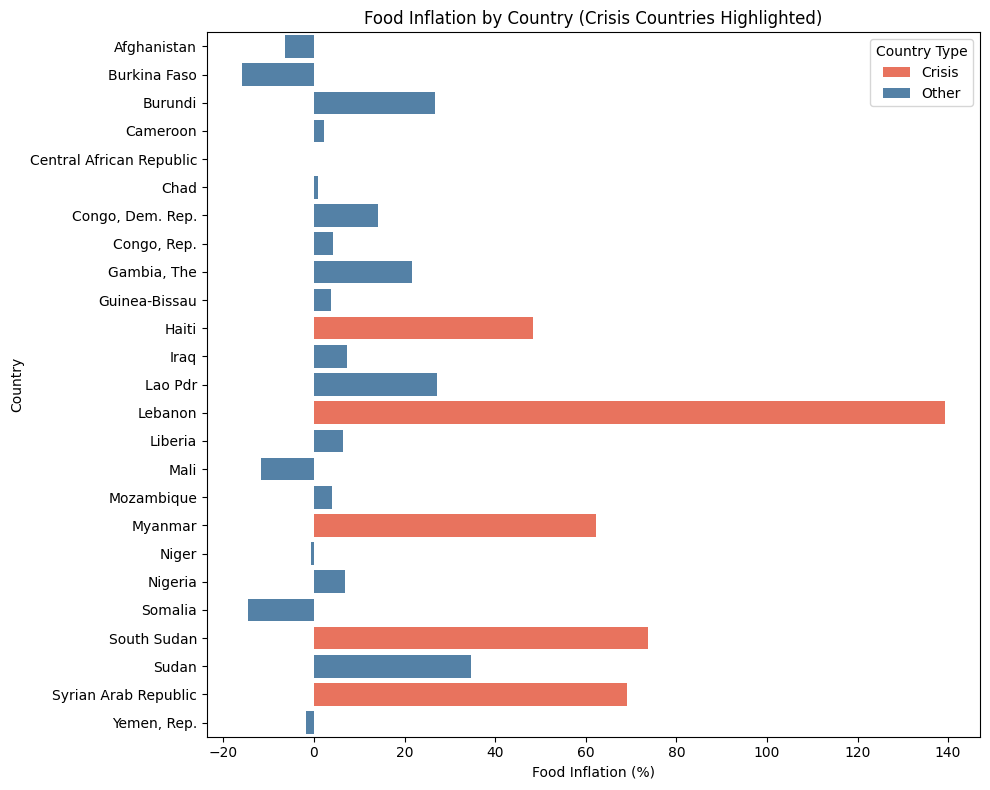

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define crisis countries
crisis_countries = ["Lebanon", "South Sudan", "Syrian Arab Republic", "Myanmar", "Haiti"]

# Create a new column for highlighting
df["crisis_flag"] = df["country"].apply(lambda x: "Crisis" if x in crisis_countries else "Other")

# Sort by inflation
df_sorted = df.sort_values("inflation", ascending=False)

# Plot with seaborn
plt.figure(figsize=(10,8))
sns.barplot(
    data=df_sorted,
    y="country",
    x="inflation",
    hue="crisis_flag",
    dodge=False,
    palette={"Crisis": "tomato", "Other": "steelblue"}
)

plt.title("Food Inflation by Country (Crisis Countries Highlighted)")
plt.xlabel("Food Inflation (%)")
plt.ylabel("Country")
plt.legend(title="Country Type")
plt.tight_layout()
plt.show()


### Testing H1 - Geopolitical Unrest and Inflation

In this chart, countries experiencing well-documented crises are highlighted in **red**.  
These include **Lebanon, South Sudan, Syria, Myanmar, and Haiti**.

**Observations:**
- These crisis-affected countries are clustered at the **top of the inflation distribution**, with Lebanon showing extreme food inflation (~139%).  
- Most countries without severe crises (shown in blue) have much lower and more stable inflation rates.  
- This visual pattern suggests that geopolitical and economic unrest are indeed linked to extreme food inflation outcomes.

**Interpretation:**
- Even though our dataset does not directly measure conflict or unrest, this result provides **qualitative evidence** supporting H1:  
  *Countries facing greater instability tend to suffer higher food inflation rates.*  
- The outliers align with global reporting on crises, reinforcing the validity of the dataset and our interpretation.
- Despite our qualitative evaluation, and absence of more robust hypothesis testing, we can cautiously accept the **alternative hypothesis**


### H2 - Volatility and Inflation

- **Hypothesis:** Countries with higher average annualized food price volatility will also have higher food inflation rates.  
- **Rationale:** Price instability often accompanies upward price pressures. If volatility is high, it suggests markets are unstable, which may drive or coincide with inflationary surges.  
- **Null Hypothesis:** Food price volatility is independent of food inflation.  
- **Alternative Hypothesis:** Higher volatility is associated with higher inflation.


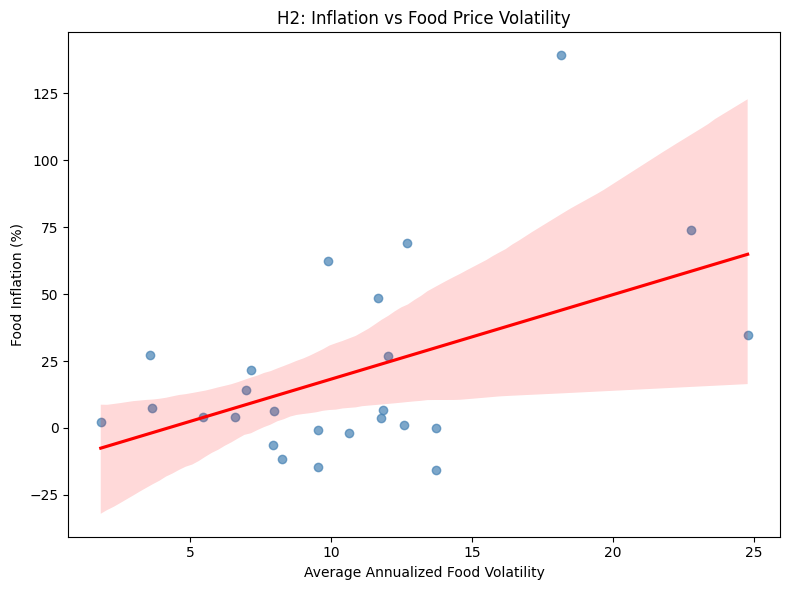

In [ ]:
# Create a regression plot for food price volatility vs inflation
plt.figure(figsize=(8,6))
sns.regplot(
    data=df,
    x="average_annualized_food_volatility",
    y="inflation",
    scatter_kws={"color":"steelblue", "alpha":0.7},
    line_kws={"color":"red"}
)

plt.title("H2: Inflation vs Food Price Volatility")
plt.xlabel("Average Annualized Food Volatility")
plt.ylabel("Food Inflation (%)")
plt.tight_layout()
plt.show()


### Testing H2 – Volatility and Inflation

**Observations:**
- The scatter plot shows a **moderate positive trend** between inflation and volatility.  
- Countries with high inflation (e.g., **Lebanon, South Sudan, Sudan**) also sit in the upper range of volatility.  
- Countries with low inflation (e.g., **Cameroon, Iraq**) have both low inflation and low volatility.

**Interpretation:**
- This supports **H2**, suggesting that food inflation is often accompanied by unstable and unpredictable price movements.  
- While correlation does not imply causation, the evidence indicates that **high inflation and high volatility frequently go hand-in-hand**, supporting our **alternative hypothesis**.


## H3 - Data Coverage and Inflation

- **Hypothesis:** Inflation outcomes are independent of the percentage of food market coverage in the dataset.  
- **Rationale:** If low coverage systematically produced extreme inflation values, results would be questionable.  
- **Null Hypothesis:** Inflation outcomes are influenced by data coverage levels.  
- **Alternative Hypothesis:** Inflation outcomes are independent of data coverage levels.


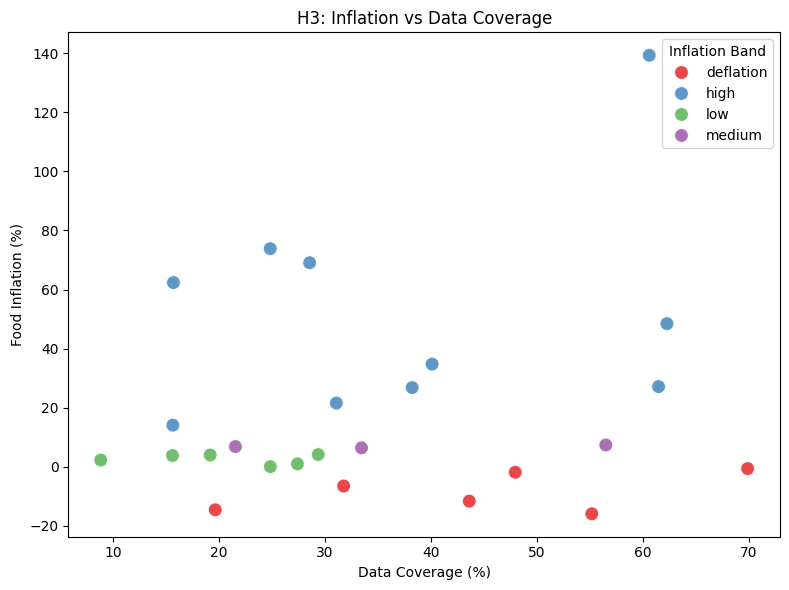

In [22]:
# Create a scatter plot for data coverage vs inflation
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="data_coverage_food",
    y="inflation",
    hue="inflation_band",
    palette="Set1",
    alpha=0.8,
    s=100
)

plt.title("H3: Inflation vs Data Coverage")
plt.xlabel("Data Coverage (%)")
plt.ylabel("Food Inflation (%)")
plt.legend(title="Inflation Band")
plt.tight_layout()
plt.show()


### Testing H3 - Data Coverage and Inflation

**Observations:**
- Extreme inflation cases (e.g., **Lebanon, South Sudan**) occur even where data coverage is relatively high.  
- Countries with **low coverage (<20%)** are scattered across the inflation range and do not cluster at extreme values.  
- There is **no visible pattern** between coverage and inflation.

**Interpretation:**
- This supports **H3**: inflation outcomes appear independent of data coverage levels.  
- The results suggest that extreme inflation reflects **real-world crises** rather than artefacts of incomplete data sampling.
- Therefore we accept our **alternative hypothesis**.
